# Praca domowa nr 7

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import seaborn as sns

Zbiór danych

Poniższe zbiory zostały wyodrębnione ze zbioru Wine UCI:

    train - bez próbek odstających, do trenowania modelu
    test - do oceny skuteczności modelu, dodana informacja o klasie 0=inliers, 1=outliers
    val - analogiczny do test, ale bez klasy

Treść zadania

Celem zadania jest wykorzytanie algorytmu GMM do wykrywania próbek odstających.

Do oceny modelu wykorzystać metryki F1 score, Precision i Recall.

## Wczytanie danych

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/mini-pw/2021L-WUM/main/Prace_domowe/Praca_domowa7/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/mini-pw/2021L-WUM/main/Prace_domowe/Praca_domowa7/test.csv")
val = pd.read_csv("https://raw.githubusercontent.com/mini-pw/2021L-WUM/main/Prace_domowe/Praca_domowa7/val.csv")

In [3]:
val

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
1,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
2,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685
3,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
4,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
5,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615
6,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520
7,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920
9,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345


In [4]:
X = test.drop('class', axis=1)
y = test[['class']]

### Wyniki bazowego modelu

In [5]:
def show_results(cov = 'full', init='kmeans'):  
    gmm = GaussianMixture(n_components=2, random_state=0, covariance_type=cov, init_params=init).fit(train)
    y_pred = gmm.predict(X)
    t = [f1_score(y, y_pred), precision_score(y, y_pred), recall_score(y, y_pred)]
    return t

base = show_results()
base_df= pd.DataFrame([base], columns = ['f1 score', 'precision', 'recall'])
base_df

,f1 score,precision,recall
0,0.470588,0.333333,0.8


### Wybór najlepszego modelu GMM

In [38]:
def all_results():
    res = []
    params = []
    for i in ['full', 'tied', 'diag', 'spherical']:
        for j in ['kmeans', 'random']:
            row = show_results(i, j)
            res.append(row)
            param = str(i)+", "+str(j)
            params.append(param)
    return pd.DataFrame(res, columns = ['f1 score', 'precision', 'recall'], index = params).sort_values('f1 score', ascending = False)

all_results()

,f1 score,precision,recall
"spherical, kmeans",0.666667,0.500000,1.0
"tied, kmeans",0.588235,0.416667,1.0
"full, kmeans",0.470588,0.333333,0.8
"full, random",0.000000,0.000000,0.0
"tied, random",0.000000,0.000000,0.0
"diag, kmeans",0.000000,0.000000,0.0
"diag, random",0.000000,0.000000,0.0
"spherical, random",0.000000,0.000000,0.0


2 najlepsze modele mają parametry:
- `covariance_type`: 'spherical' oraz `init_params`: 'kmeans'
- `covariance_type`: 'tied' oraz `init_params`: 'kmeans'

## Różnice w liczbie liczbie obserwacji sklasyfikowanych jako odstające i standardowe

In [30]:
def przydzielone_obserwacje():
    res = []
    for i in ['full', 'tied', 'spherical']:
        gmm = GaussianMixture(n_components=2, random_state=0, covariance_type=i).fit(train)
        y_pred = gmm.predict(val)
        r = [pd.DataFrame(y_pred).value_counts()[0], pd.DataFrame(y_pred).value_counts()[1]]
        res.append(r)
    return pd.DataFrame(res, index = ['full', 'tied', 'spherical'])

przydzielone_obserwacje()

,0,1
full,7,10
tied,9,8
spherical,7,10


Dla wszystkich modeli stosunek obserwacji zaklasyfikowanych jako standardowe i odstające jest podobny. 

## Wizualizacja przy użyciu PCA

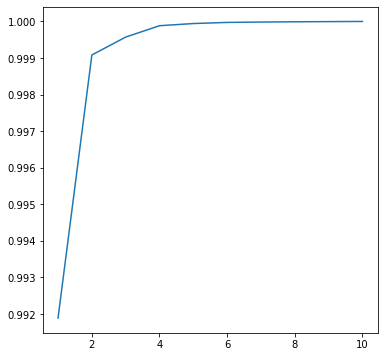

In [7]:
pca = PCA(n_components=10)
pca.fit(train)
plt.figure(figsize=[6, 6])
plt.plot(np.arange(1, 11),np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [8]:
def transform_to_df(model, df, label):
    pca2 = PCA(n_components=2)
    pca2.fit(train)
    X_2 = pca2.transform(df)
    if label:
        X_2df = pd.DataFrame({'x': X_2[:, 0], 'y': X_2[:, 1], 'label':np.array(y).reshape(1, -1)[0], 
                          'cluster': model.fit_predict(X_2).astype('str')})
    else:
        X_2df = pd.DataFrame({'x': X_2[:, 0], 'y': X_2[:, 1], 'cluster': model.fit_predict(X_2).astype('str')})
    return X_2df

In [9]:
def plot_clusters(df, label):
    plt.figure(figsize=[10, 6])
    if (label):
        sns.scatterplot(data=df, x='x', y='y', hue='label', style='cluster')
    else:
        sns.scatterplot(data=df, x='x', y='y', hue='cluster')
    plt.show()

## Wizualizacja podziału klastrów dla bazowego modelu
### Zbiór testowy

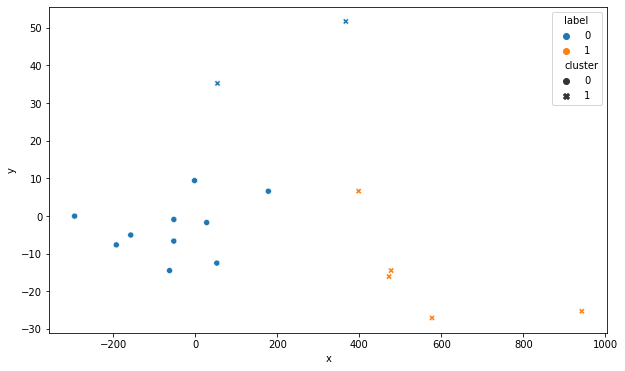

In [10]:
basic = GaussianMixture(n_components=2)
df_1 = transform_to_df(basic, X, True)
plot_clusters(df_1, True)

### Zbiór walidacyjny

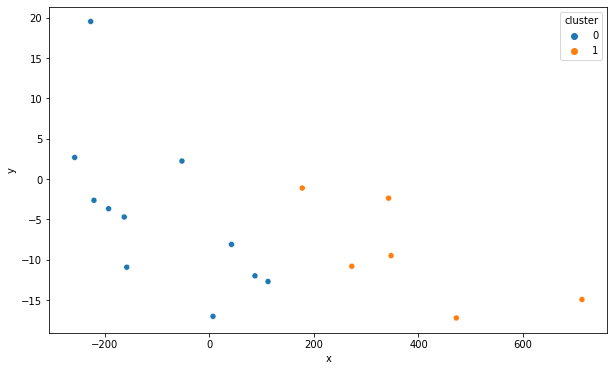

In [11]:
df_1 = transform_to_df(basic, val, False)
plot_clusters(df_1, False)

Przy użyciu bazowegomodelu oraz PCA 6 obserwacji zostało zaklasyfikownych jako obserwacje odstające.

## Wizualizacja podziału klastrów dla najlepszego modelu
### Zbiór testowy

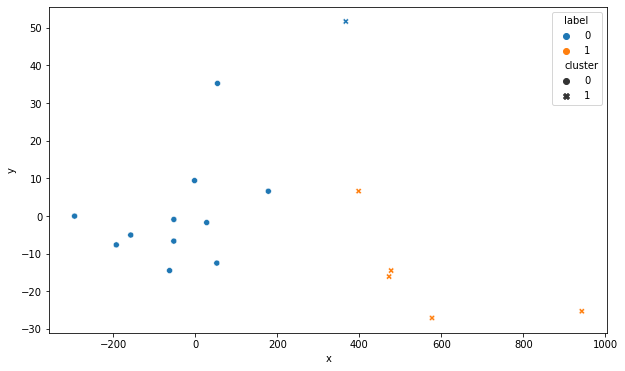

In [14]:
best = GaussianMixture(n_components=2, covariance_type='spherical')
df_1 = transform_to_df(best, X, True)
plot_clusters(df_1, True)

### Zbiór walidacyjny

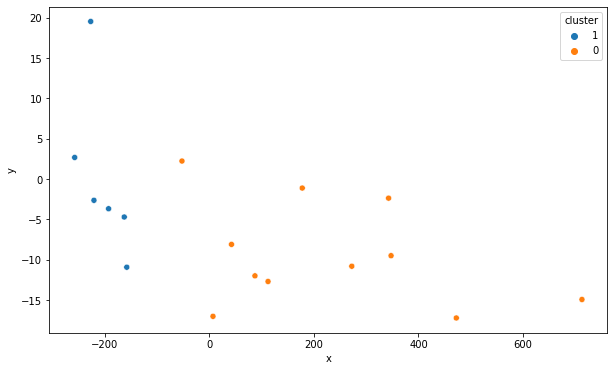

In [40]:
df_1 = transform_to_df(best, val, False)
plot_clusters(df_1, False)

Zastosowanie PCA zwiększyło liczbę obserwacji sklasyfikowanych jako odsatające.
Podsumowując, warto rozważyć wymienione 3 modele:
- GaussianMixture() z bazowymi parametrami
- GaussianMixture() z parametrami `covariance_type`: 'spherical' oraz `init_params`: 'kmeans'
- GaussianMixture() z parametrami`covariance_type`: 'tied' oraz `init_params`: 'kmeans' 